<img src="Figures/LogoColorHorizontal.png" style="width:200px" align="left">    <img src="Figures/MetaWorksLogo.png" style="width:200px" align="right">

***

# Visualizing the Aperture Parameters

### April 24, 2020

---

### Contents

* Introduction
* A 1D aperture with ideal dipoles
* A 2D aperture with ideal dipoles
* Constrained dipoles

### Introduction

When computing the properties of various aperture layouts, it is often useful to quickly access the layout of the radiating elements (each of which is modeled as a polarizable dipole), as well as the driving fields and other parameters associated with the configuration. The DataAnalysis class provides a collection of functions that allow a variety of representations of the aperture components.

To provide examples of using the visualization capabilities, begin by loading the required modules:

In [88]:
from metaworks.SystemArchitecture import SystemArchitecture
from metaworks.ModulationPattern import ModulationPattern
from metaworks.DataAnalysis import DataAnalysis

Define some useful constants here:

In [42]:
cm = 0.01

Create a SystemArchitecture object and a DataAnalysis object:

In [47]:
sa = SystemArchitecture()
dt = DataAnalysis()

The sa object contains a set of default configuration parameters, which we can summarize:

In [48]:
sa.summarize_parameters()
sa.guide_index

Operating Frequency: 10.0 GHz
Operating Wavelength: 2.99792458 cm
Dipole Type: ideal-unconstrained
Layout Type: linear 1D
Dipole Spacing: 0.75cm
Aperture Size: 23.25cm
Number of Dipoles: 31
Feed Type: plane wave
Waveguide Index: 2.5
Modulation Type: None


2.5

### A 1D Aperture with Ideal Dipoles

Using this initial 1D aperture (in the sense that there is only a linear array of dipoles), we can add a modulation pattern for later visualization. We first consider a beam that will be directed broadside.

In [49]:
mp = ModulationPattern(sa, modulation_type='ideal')
mp.directed_beam(sa,0)

The basic layout can be first depicted as follows.

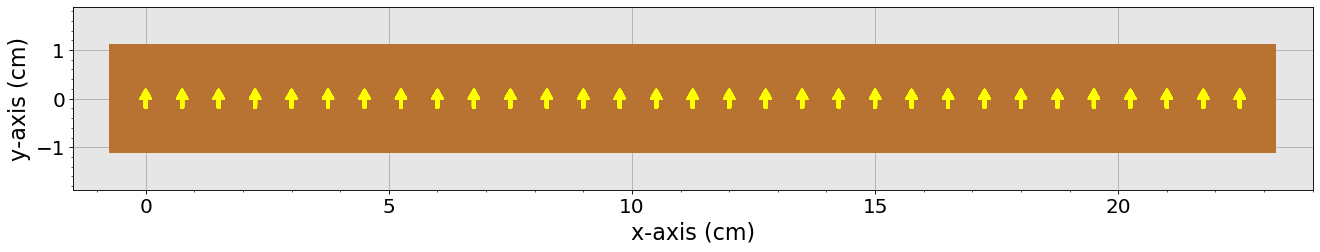

In [50]:
dt.plot_dipole_layout(sa, show_dipoles=True, show_feed_field=False)

In this simple example, the aperture is depicted as a copper-colored region that is arbitrarily set to some width and length. The dipoles are laid out in a 1D array. In this simple example, the dipoles are fed by a 1D feed wave, which is taken as a plane wave for simplicity. We can plot this in a semi-continuous manner:

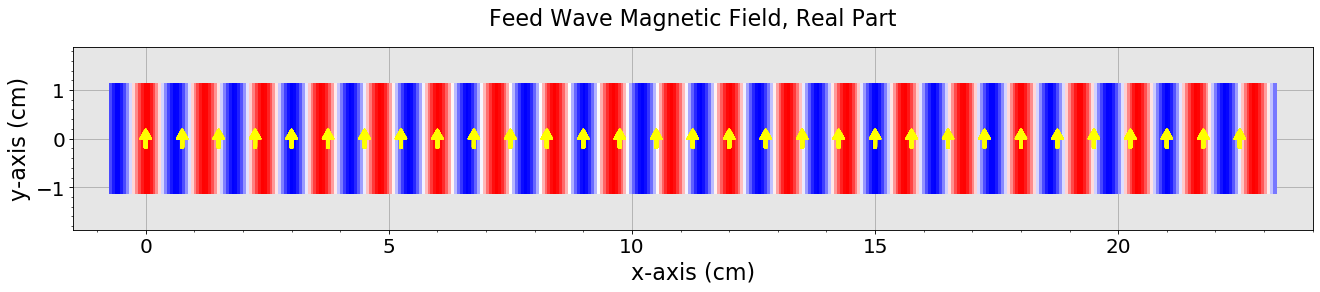

In [51]:
dt.plot_dipole_layout(sa, show_dipoles=True, show_feed_field=True)

By default, the real part of the driving magnetic field is shown, since the dipoles are approximated as polarizable magnetic dipoles. We can instead visualize the phase of the feed wave:

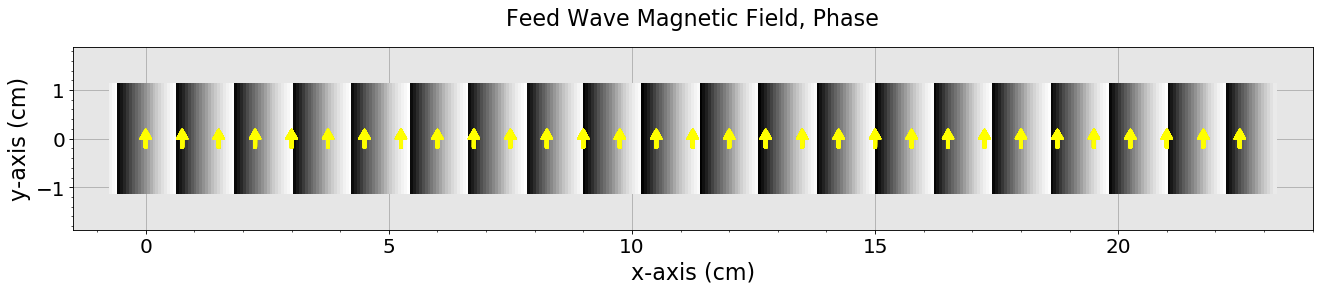

In [52]:
dt.plot_dipole_layout(sa, show_dipoles=True, show_feed_field=True, show_phase=True)

Alternatively, we may be interested only in the phase of the feed wave sampled by each dipole, which samples the aperture in discrete steps:

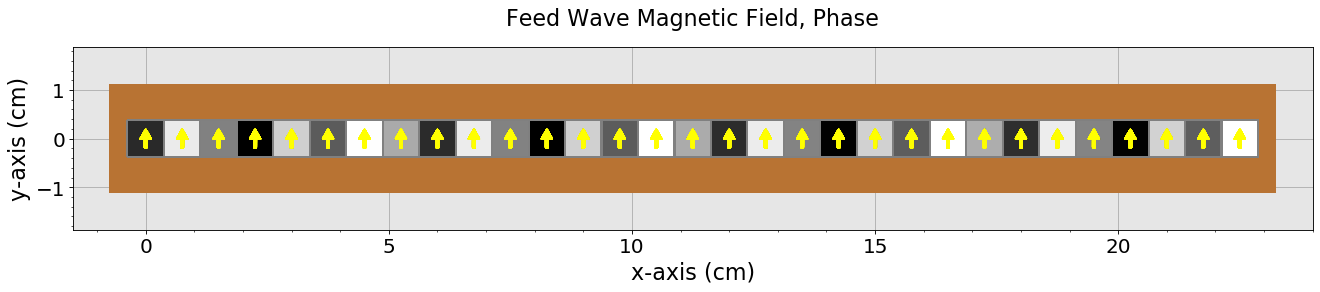

In [53]:
dt.plot_dipole_layout(sa, show_dipoles=True, show_feed_field=True, show_phase=True,
                   as_sampled=True)

In this case, it's useful to have a color bar:

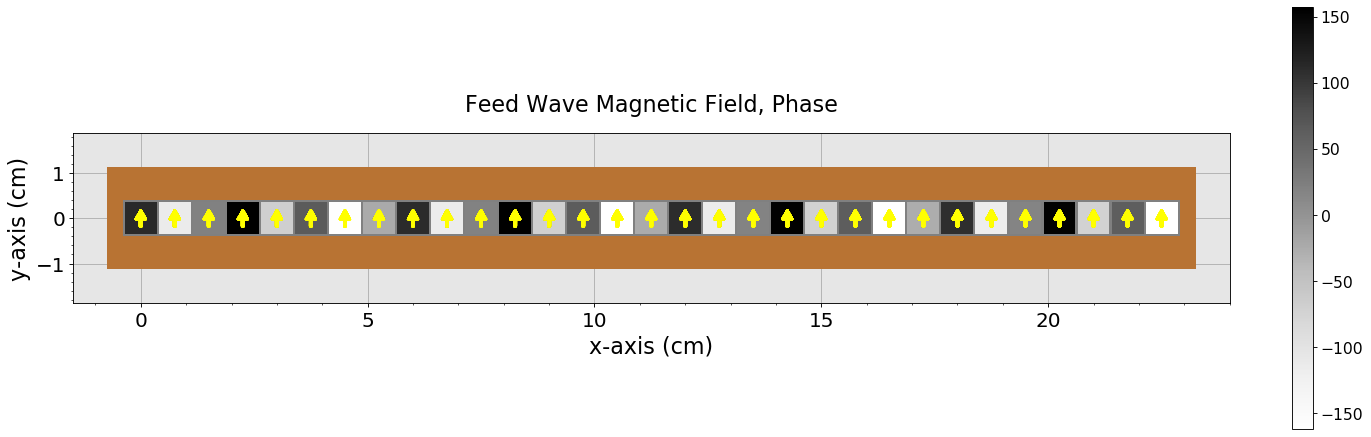

In [54]:
dt.plot_dipole_layout(sa, show_dipoles=True, show_feed_field=True, show_phase=True,
                   as_sampled=True, show_color_bar=True)

A critical parameter of interest will be the polarizability distribution (alpha), as well as the array factor. The polarizability distribution can be plotted:

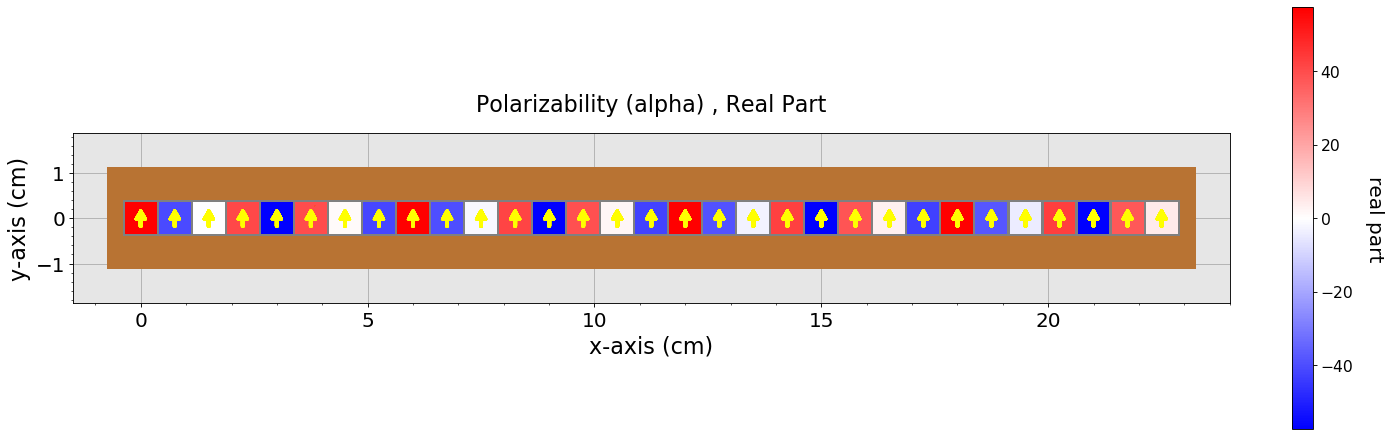

In [55]:
dt.plot_dipole_layout(sa, show_dipoles=True, show_alpha=True, 
                   as_sampled=True, show_color_bar=True)

Without more information, the polarizability values are a little difficult to visualize. The weights, which are the polarizability values multiplied by the feed field values, are easier to understand since they essentially reflect the array factor.

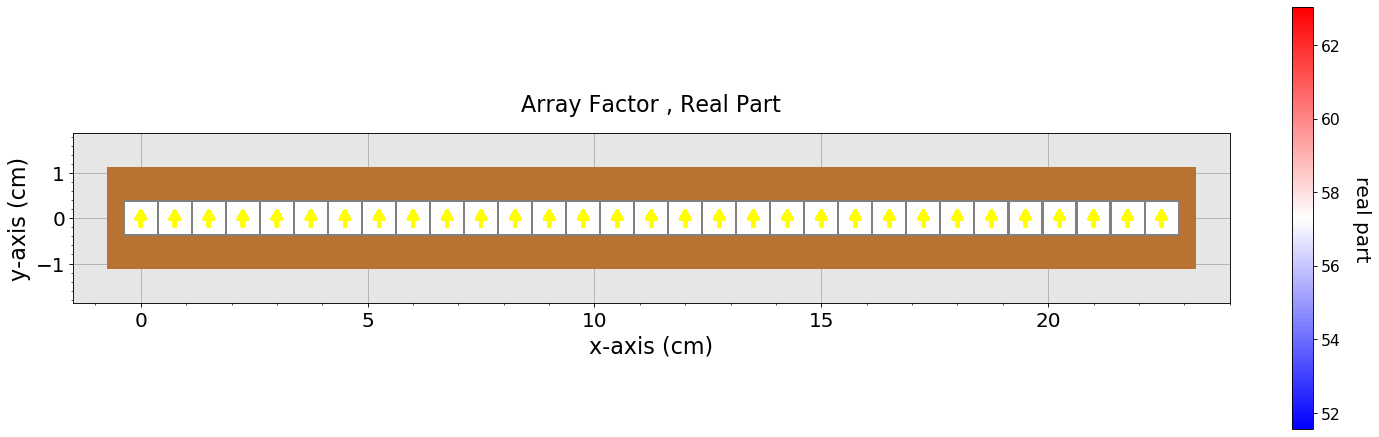

In [56]:
dt.plot_dipole_layout(sa, show_dipoles=True, show_array_factor=True, 
                   as_sampled=True, show_color_bar=True)

That all elements have the same value is consistent with the formation of a beam at broadside. Tilting the beam leads to a periodic variation in the weights:

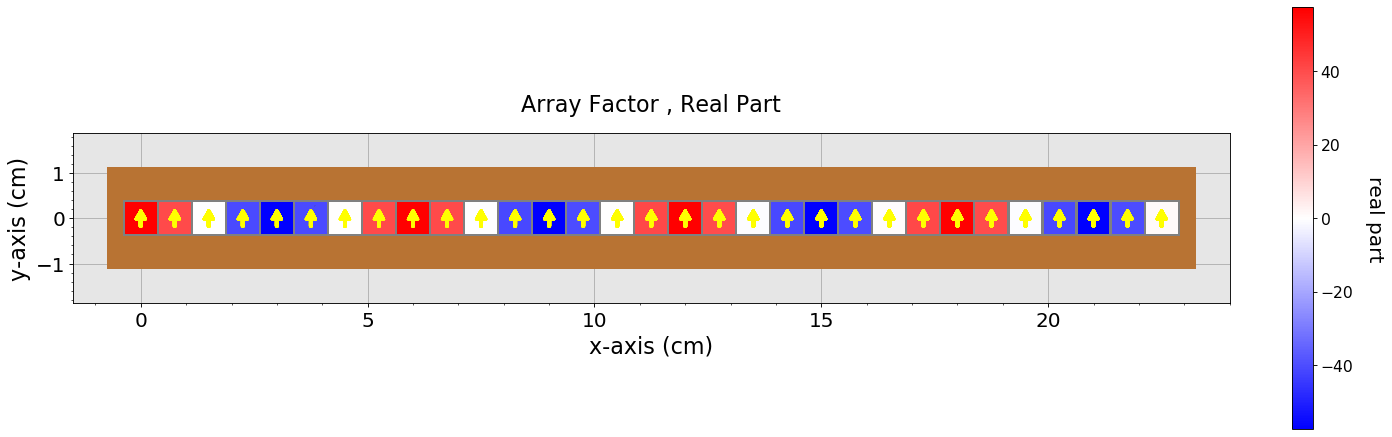

In [57]:
mp.directed_beam(sa,30)
dt.plot_dipole_layout(sa, show_dipoles=True, show_array_factor=True, 
                   as_sampled=True, show_color_bar=True)

Or, just visualizing the phase advance,

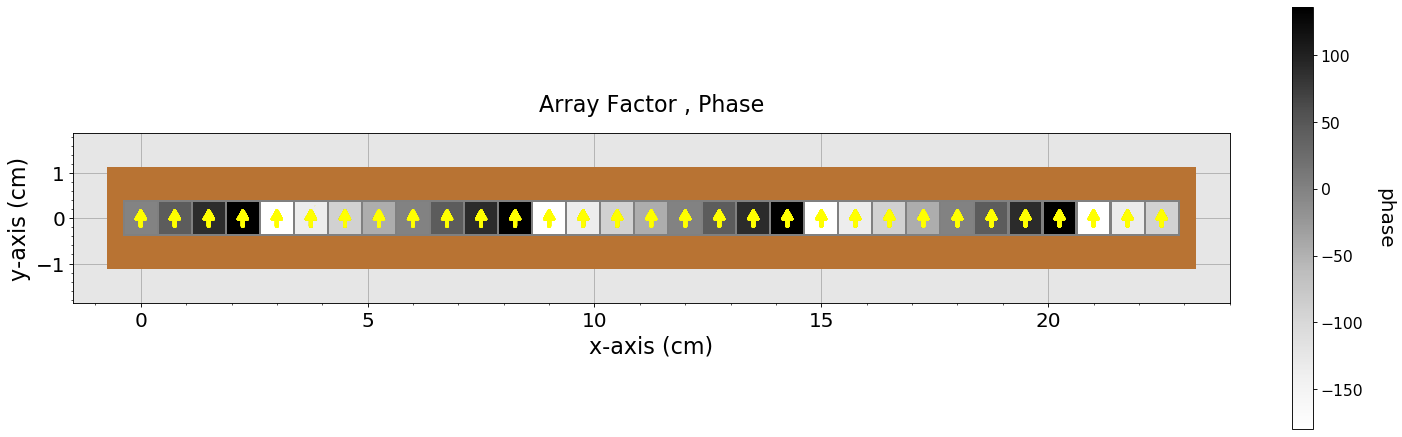

In [58]:
mp.directed_beam(sa,30)
dt.plot_dipole_layout(sa, show_dipoles=True, show_array_factor=True, 
                   as_sampled=True, show_phase=True, show_color_bar=True)

### A 2D Aperture with Ideal Dipoles

Apertures with dipoles tiling the full two-dimensional surface can also be visualized using the DataAnalysis class. Begin by creating a second aperture, and using a 2D beam forming scheme.

In [68]:
sa2 = SystemArchitecture()
sa2.make_linear_2D_array(0.4*cm, 0.4*cm, number_elements_x=15, number_elements_y=15)
sa2.summarize_parameters()

Operating Frequency: 10.0 GHz
Operating Wavelength: 2.99792458 cm
Dipole Type: ideal-unconstrained
Layout Type: linear 2D
Dipole Spacing along x: 0.4cm
Dipole Spacing along y: 0.4cm
Aperture Size along x: 5.6cm
Aperture Size along y: 5.6cm
Number of Dipoles along x: 15
Number of Dipoles along y: 15
Feed Type: plane wave
Waveguide Index: 2.5
Modulation Type: None


In [70]:
mp = ModulationPattern(sa2, modulation_type='ideal')
mp.directed_beam_2D(sa2, 0, 30)

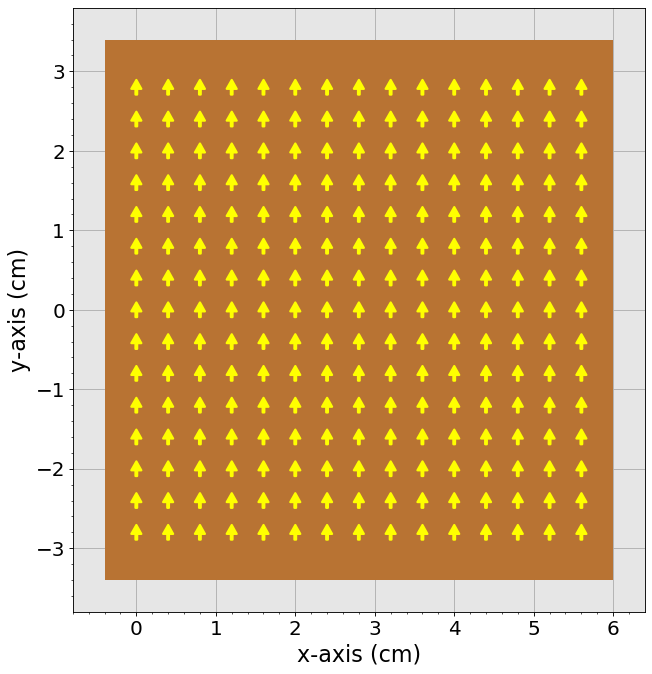

In [72]:
dt.plot_dipole_layout(sa2, show_dipoles=True)

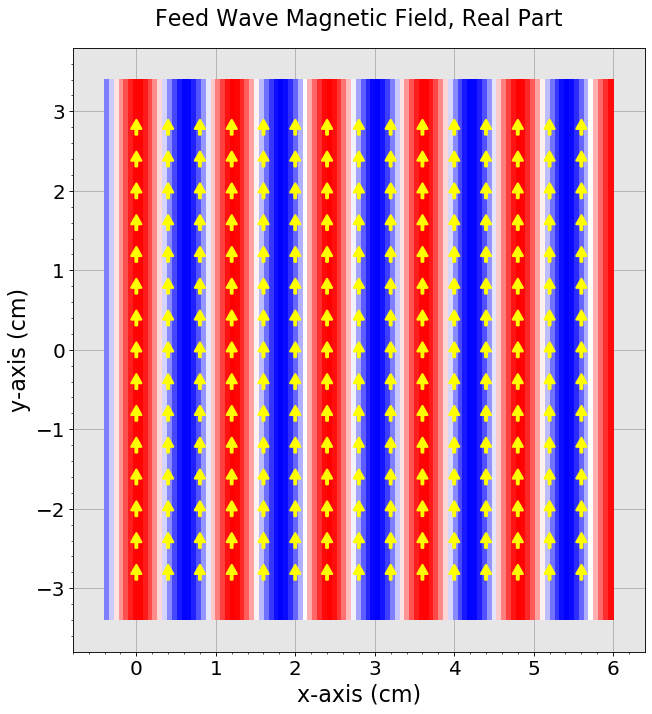

In [73]:
dt.plot_dipole_layout(sa2, show_dipoles=True, show_feed_field=True, as_sampled=False)

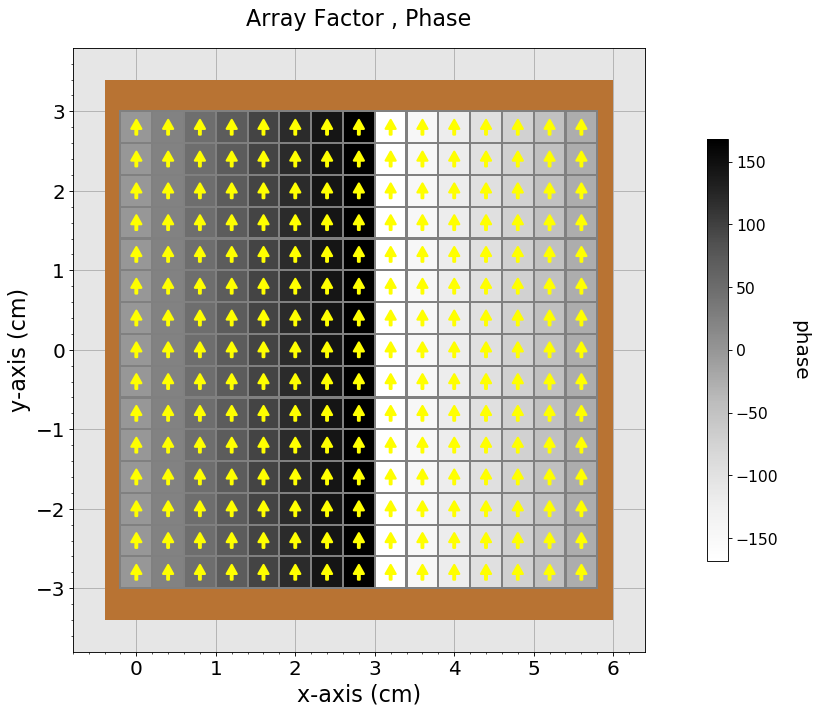

In [74]:
dt.plot_dipole_layout(sa2, show_dipoles=True, show_array_factor=True, as_sampled=True,
                   show_color_bar=True, show_phase=True)

In [77]:
mp.directed_beam_2D(sa2, 45, 30)

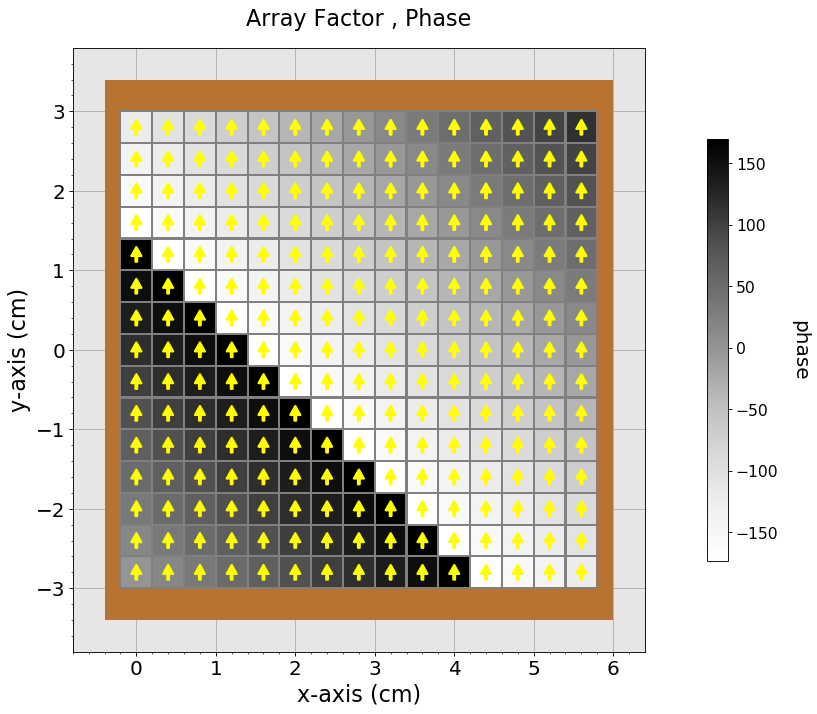

In [78]:
dt.plot_dipole_layout(sa2, show_dipoles=True, show_array_factor=True, as_sampled=True,
                   show_color_bar=True, show_phase=True)

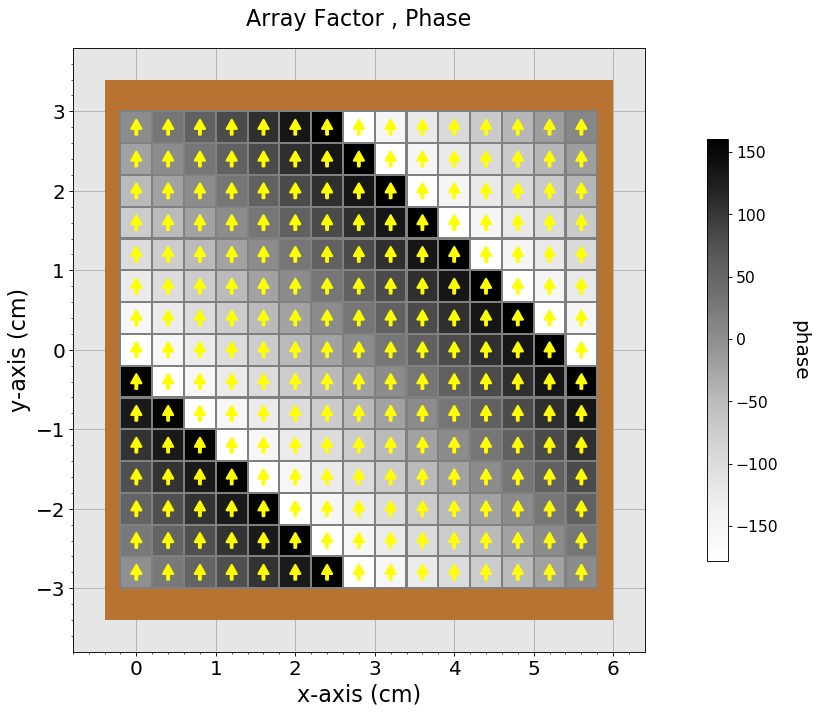

In [79]:
mp.directed_beam_2D(sa2, 45, 50)
dt.plot_dipole_layout(sa2, show_dipoles=True, show_array_factor=True, as_sampled=True,
                   show_color_bar=True, show_phase=True)

### Constrained dipoles

We can understand the impact of using constrained dipoles versus ideal, unconstrained dipoles by considering a simple 1D aperture. To make the difference easier to see, we use dipoles in a 1D aperture that are tightly spaced (compared with the first example above).

In [90]:
sa3 = SystemArchitecture()
sa3.make_linear_array(0.1*cm, number_elements=60)
mp.directed_beam(sa3,0)

In [81]:
sa3.summarize_parameters()

Operating Frequency: 10.0 GHz
Operating Wavelength: 2.99792458 cm
Dipole Type: ideal-unconstrained
Layout Type: linear 1D
Dipole Spacing: 0.1cm
Aperture Size: 5.9cm
Number of Dipoles: 60
Feed Type: plane wave
Waveguide Index: 2.5
Modulation Type: None


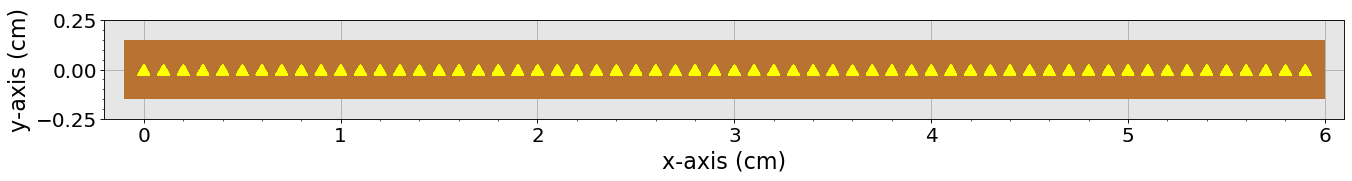

In [82]:
dt.plot_dipole_layout(sa3, show_dipoles=True)

The phases and magnitudes of the weights are uniform:

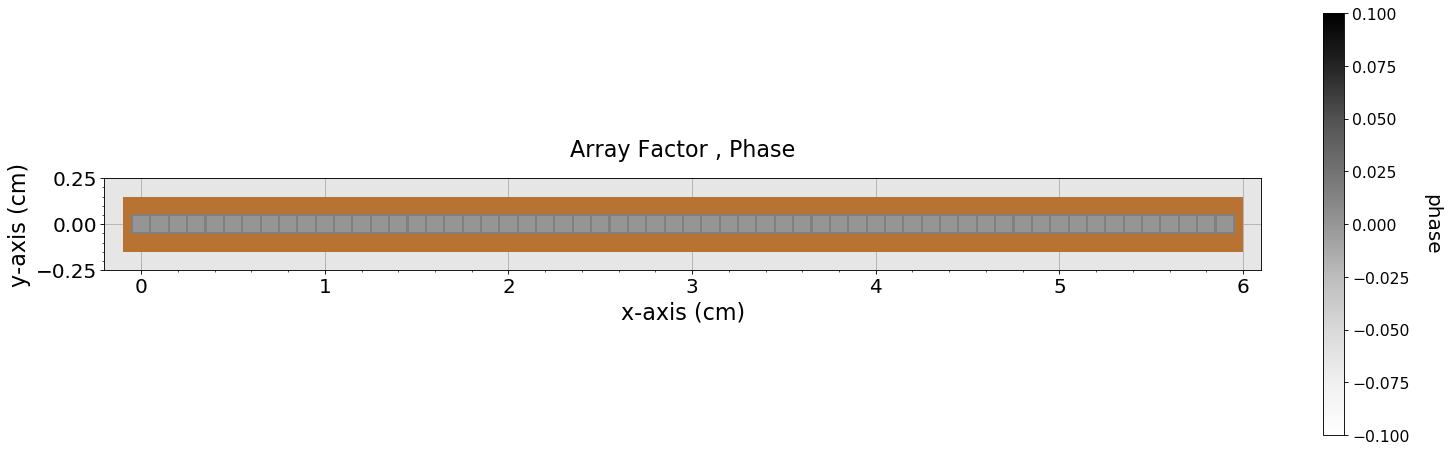

In [83]:
dt.plot_dipole_layout(sa3, show_dipoles=False, show_array_factor=True, as_sampled=True,
                   show_phase=True, show_color_bar=True)

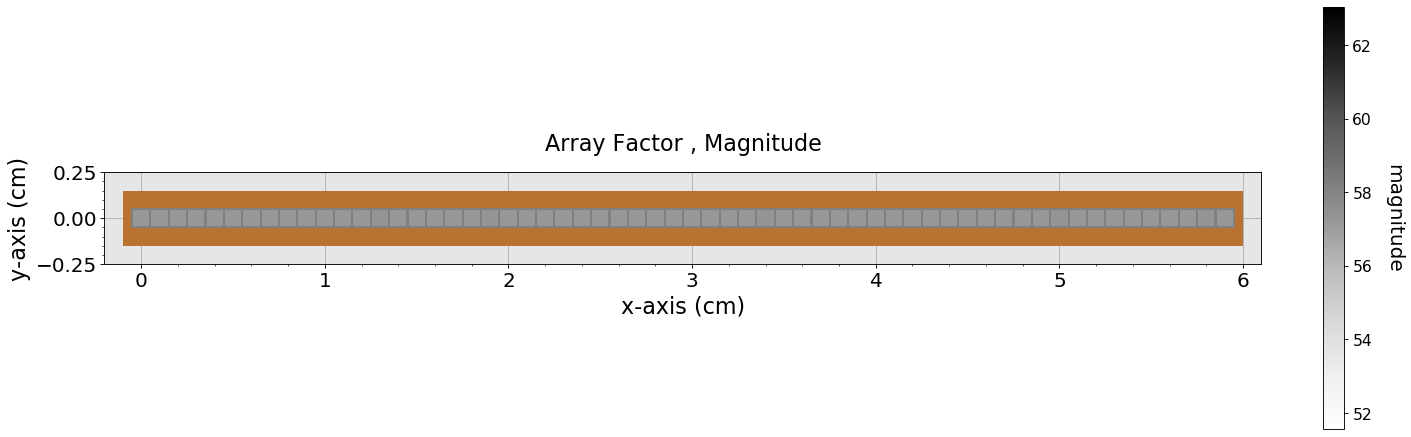

In [84]:
dt.plot_dipole_layout(sa3, show_dipoles=False, show_array_factor=True, as_sampled=True,
                   show_magnitude=True, show_color_bar=True)

Now, change the dipoles to Lorentzian-constrained, with a modulation pattern that optimizes for the array factor.

In [94]:
sa3.dipole_type='ideal-constrained-lorentzian'
mp=ModulationPattern(sa3, modulation_type='af-optimized')
mp.directed_beam(sa3,0)

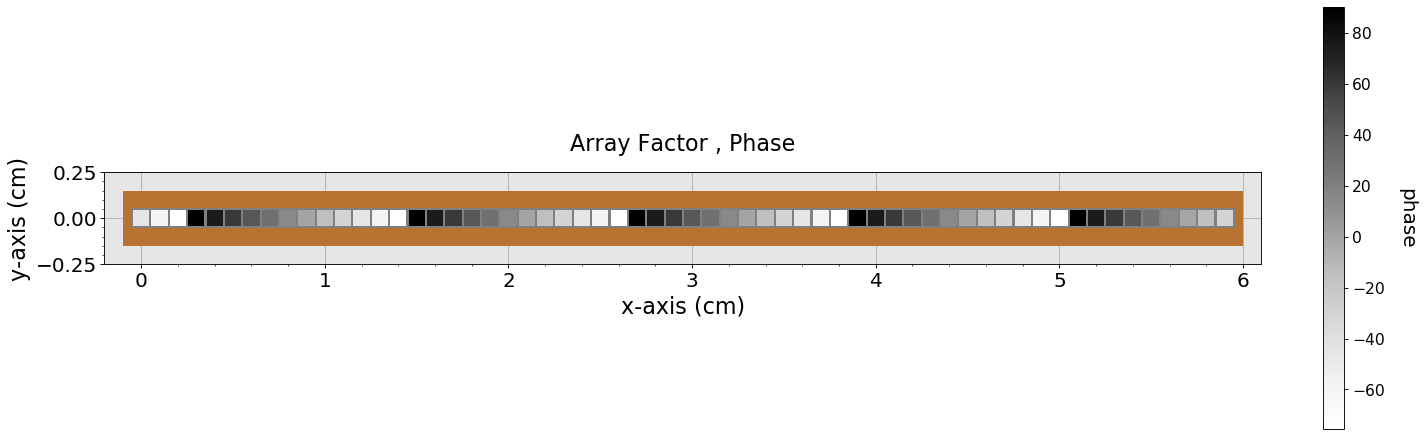

In [96]:
dt.plot_dipole_layout(sa3, show_dipoles=False, show_array_factor=True, as_sampled=True,
                   show_phase=True, show_color_bar=True)

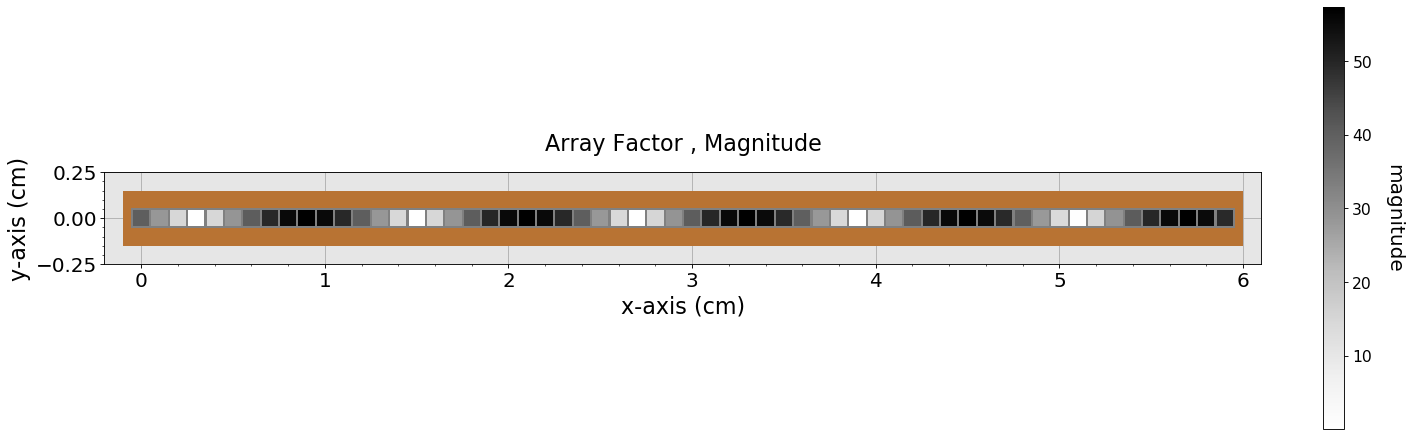

In [98]:
dt.plot_dipole_layout(sa3, show_dipoles=False, show_array_factor=True, as_sampled=True,
                   show_magnitude=True, show_color_bar=True)

The constrained dipoles exhibit a periodicity in both phase and magnitude, which can lead to at least one grating lobe under certain conditions. 